In [347]:
"""
!git clone -b EMT https://github.com/pop756/Quantum_KAN.git
%cd Quantum_KAN
!pip install -r requirements.txt"""

'\n!git clone -b EMT https://github.com/pop756/Quantum_KAN.git\n%cd Quantum_KAN\n!pip install -r requirements.txt'

In [348]:
import pennylane as qml
from pennylane import numpy as np
import random





def ising_model_circuit(num_qubits=4,num_layer = 2,single='X',double='ZZ',J=0.25,h=0.125):
    """
    Creates a parameterized quantum circuit for simulating the Ising model
    with specified number of qubits and layers. The circuit includes random 
    interaction strengths and external field strengths.
    
    Args:
    num_qubits (int): Number of qubits in the circuit.
    num_layer (int): Number of layers of Ising interactions and external field terms.
    
    Returns:
    cost (function): The cost function which returns the expected value of the PauliZ observable on the first qubit.
    """
        
    # Define the device
    
    # Define random interaction strengths and external field strengths
    J = np.array(list([J])*num_qubits)
    h = np.array(list([h])*num_qubits)

    def circuit(params):
        # Apply RX rotations with parameters
        for i in range(num_qubits):
            qml.RX(params[i], wires=i)
        for j in range(num_layer):
            # Apply Ising ZZ interactions
            for i in range(num_qubits - 1):
                getattr(qml,f"Ising{double}")(2 * J[i], wires=[i, i+1])

            
            # Apply external field X terms
            for i in range(num_qubits):
                getattr(qml,f"R{single}")(2 * h[i], wires=i)
    
    return circuit


num_qubits=4
# ÎûúÎç§ Í≤åÏù¥Ìä∏ ÏÑ†ÌÉù Ìï®Ïàò
def random_gate():
    gates = [
        qml.RX,
        qml.RY,
        qml.RZ,
        qml.CNOT,
        qml.CZ
    ]
    return np.random.choice(gates)

# ÎûúÎç§ ÌååÎùºÎØ∏ÌÑ∞ ÏÉùÏÑ± Ìï®Ïàò
def random_parameters(gate):
    if gate in [qml.RX, qml.RY, qml.RZ]:
        return [np.random.uniform(0, 2 * np.pi)]
    return []

# ÎûúÎç§ ÌöåÎ°ú ÏÉùÏÑ± Ìï®Ïàò
def create_random_circuit(num_gates,params):
    def circuit():
        index=0
        for _ in range(num_gates):
            gate = random_gate()
            if gate in [qml.CNOT, qml.CZ]:
                qubits = np.random.choice(num_qubits, 2, replace=False)
                gate(wires=qubits)
            else:
                qubits = [np.random.choice(num_qubits)]
                gate(params[index], wires=qubits)
                index +=1
    return circuit

# ÎûúÎç§ ÌöåÎ°ú ÏÉùÏÑ±
num_gates = 5  # ÏÇ¨Ïö©Ìï† Í≤åÏù¥Ìä∏ Ïàò
random_circuit = create_random_circuit(num_gates)
dev = qml.device("default.mixed", wires=num_qubits)
@qml.qnode(dev)
def quantum_circuit():
    random_circuit()
    return qml.Identity(0)


# Example usage
num_parameters = 4  # One parameter per qubit for RX rotations
params = list(np.random.uniform(0, 2 * np.pi, num_parameters))
random_circuit = ising_model_circuit(4,2,single='Y',double='ZZ',J=0.25,h=0.125)
train_circuit = ising_model_circuit(4,2,single='Y',double='ZZ',J=0.,h=0.125)


@qml.qnode(dev)
def test_circuit(params):
    random_circuit(params)
    return qml.expval(qml.Identity(0)) 

@qml.qnode(dev)
def train_circuit(params):
    train_circuit(params)
    return qml.expval(qml.Identity(0)) 

print(random_circuit(params))
print(qml.draw(random_circuit)(params))


0.9999999999999993
0: ‚îÄ‚îÄRX(3.45)‚îÄ‚ï≠IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï≠IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
1: ‚îÄ‚îÄRX(4.49)‚îÄ‚ï∞IsingZZ(0.50)‚îÄ‚ï≠IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï∞IsingZZ(0.50)‚îÄ‚ï≠IsingZZ(0.50)
2: ‚îÄ‚îÄRX(3.79)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï∞IsingZZ(0.50)‚îÄ‚ï≠IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï∞IsingZZ(0.50)
3: ‚îÄ‚îÄRX(3.42)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï∞IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§  <I>
‚îÄ‚îÄ‚îÄRY(0.25)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§     
‚îÄ‚îÄ‚ï≠IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚î§     
‚îÄ‚îÄ‚ï∞IsingZZ(0.50)‚îÄ‚îÄRY(0.25)‚îÄ‚î§     


In [1]:
import pennylane as qml
import numpy as np
import random


# ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï
num_qubits = 7  # ÏÇ¨Ïö©ÌïòÍ≥† Ïã∂ÏùÄ ÌÅêÎπÑÌä∏ Ïàò
pauli_list = ['X','Y','Z']


meas1 = qml.Hamiltonian([1]*num_qubits, [getattr(qml,f"Pauli{pauli_list[random.randint(0,2)]}")(i) for i in range(num_qubits)],grouping_type='qwc')
dev = qml.device("default.mixed", wires=num_qubits)

# ÎûúÎç§ Í≤åÏù¥Ìä∏ ÏÑ†ÌÉù Ìï®Ïàò
def random_gate():
    gates = [
        qml.RX,
        qml.RY,
        qml.RZ,
        qml.CRX,
        qml.CRZ
    ]
    return np.random.choice(gates)

# ÎûúÎç§ ÌååÎùºÎØ∏ÌÑ∞ ÏÉùÏÑ± Ìï®Ïàò
def random_parameters(gate):
    if gate in [qml.RX, qml.RY, qml.RZ, qml.CRX, qml.CRZ]:
        return [np.random.uniform(0, 2 * np.pi)]
    return []

# ÎûúÎç§ ÌöåÎ°ú ÏÉùÏÑ± Ìï®Ïàò
def create_random_circuit(num_gates,seed=21):
    def train_circuit(params):
        np.random.seed(seed)
        num_params = 0
        for _ in range(num_gates):
            gate = random_gate()
            if gate in [qml.CRX, qml.CRZ]:
                qubits = np.array(np.random.choice(range(num_qubits), 2, replace=False))
                gate(0,wires=qubits)
            else:
                qubits = [np.random.choice(num_qubits)]
                gate(params[num_params], wires=qubits)
            num_params+=1
    def test_circuit(params):
        np.random.seed(seed)
        num_params = 0
        for _ in range(num_gates):
            gate = random_gate()
            if gate in [qml.CRX, qml.CRZ]:
                qubits = np.array(np.random.choice(range(num_qubits), 2, replace=False))
            else:
                qubits = [np.random.choice(num_qubits)]
            gate(params[num_params], wires=qubits)
            num_params+=1
    return train_circuit,test_circuit

# ÎûúÎç§ ÌöåÎ°ú ÏÉùÏÑ±
num_gates = 40  # ÏÇ¨Ïö©Ìï† Í≤åÏù¥Ìä∏ Ïàò
train,val = create_random_circuit(num_gates,seed=random.randint(0,200))

@qml.qnode(dev)
def test_circuit(params):
    val(params)
    return qml.expval(meas1) 

@qml.qnode(dev)
def train_circuit(params):
    train(params)
    return qml.expval(meas1) 



In [2]:
meas1

  (1) [Y0]
+ (1) [Y1]
+ (1) [X2]
+ (1) [X3]
+ (1) [X4]
+ (1) [Y5]
+ (1) [X6]


In [3]:
print(qml.draw(train_circuit)([1]*num_gates))
print(meas1)
print(qml.draw(test_circuit)([1]*num_gates))

0: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï≠RZ(0.00)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï≠‚óè‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRY(1.00)
1: ‚îÄ‚îÄRZ(1.00)‚îÄ‚ï≠RX(0.00)‚îÄ‚îÄRZ(1.00)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
2: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRY(1.00)‚îÄ‚îÄRX(1.00)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRZ(1.00)‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRX(1.00)
3: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ï∞‚óè‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRY(1.00)‚îÄ‚îÄRZ(1.00)‚îÄ‚îÄRZ(1.00)‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRZ(1.00)‚îÄ‚îÇ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
4: ‚îÄ‚îÄRY(1.00)‚îÄ‚ï≠‚óè‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄRY(1.00)‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

(<Figure size 2800x800 with 1 Axes>, <Axes: >)


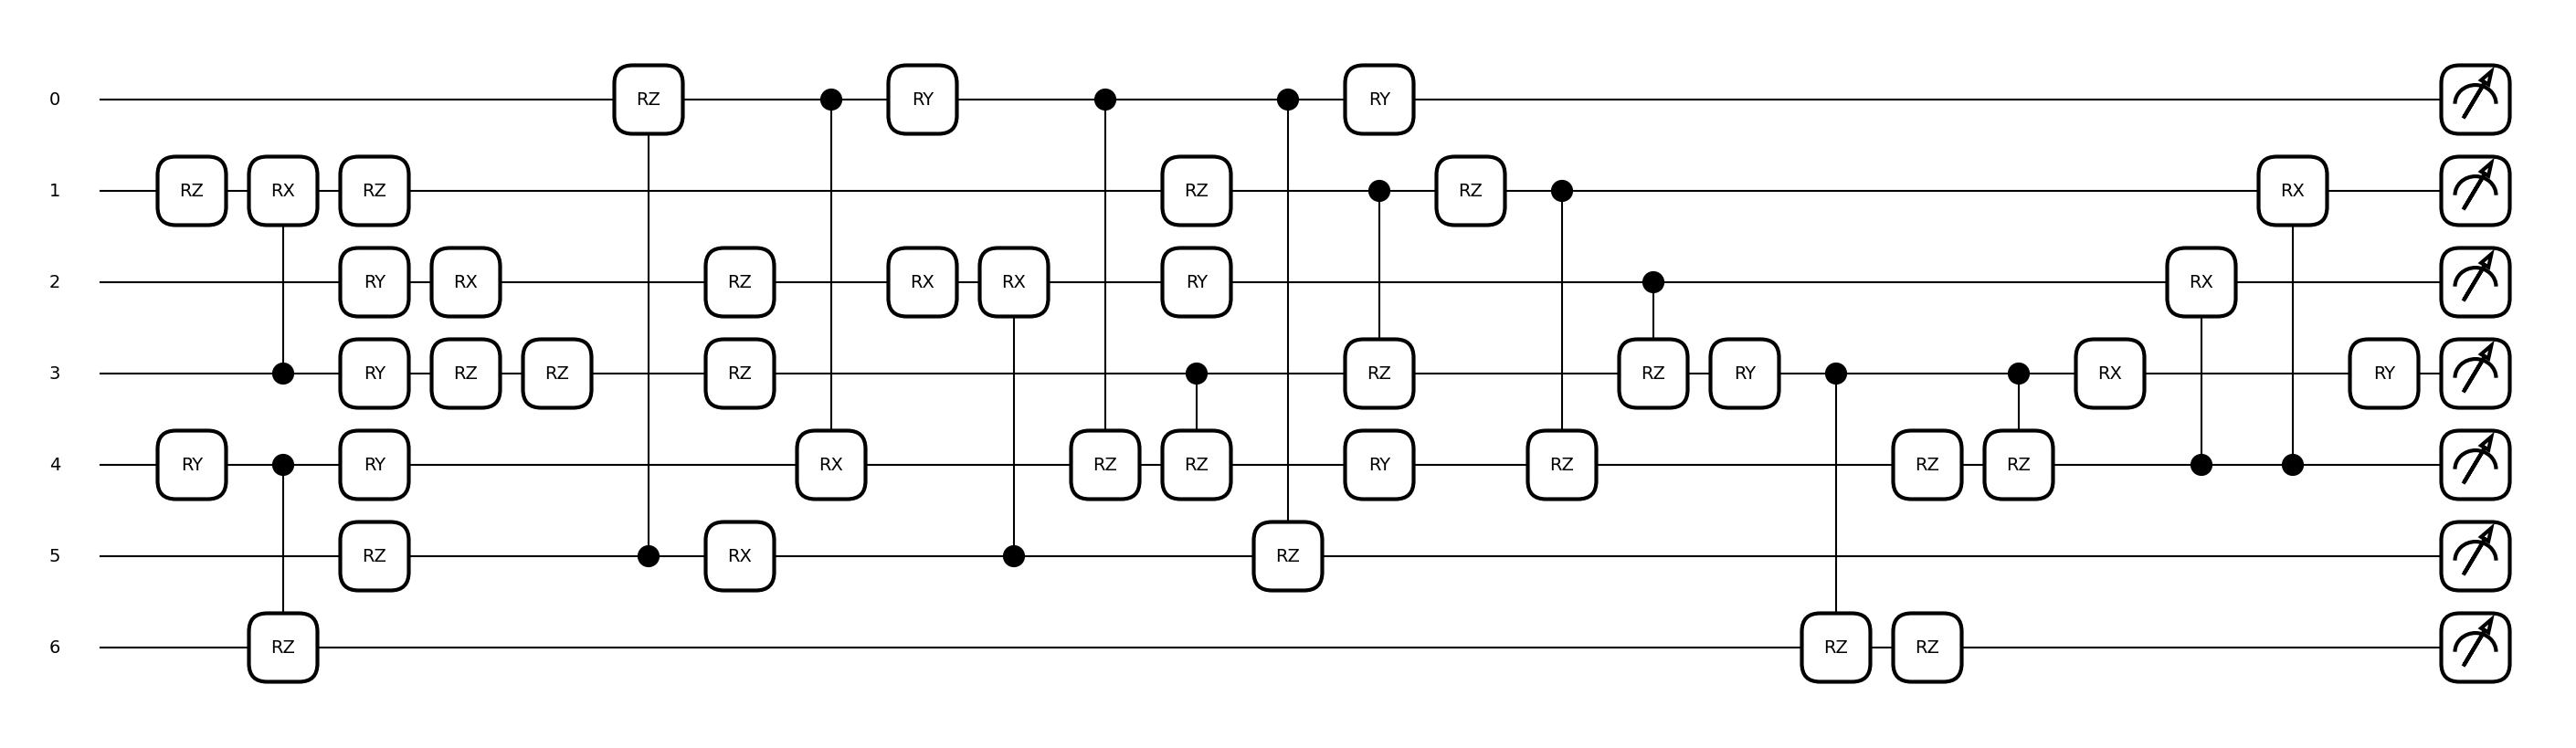

In [4]:
print(qml.draw_mpl(test_circuit)([1]*num_gates))

In [5]:
import pennylane as qml
from pennylane import numpy as np
import torch

def extra_polation(circ,H,theta,noise_factor=[1,3,5],p1=0.01,p2=0.02):
    """Í≤åÏù¥Ìä∏ Ìè¥Îî©ÏúºÎ°ú ÎÖ∏Ïù¥Ï¶àÎ•º ÎßåÎì§Í≥† Í∑∏ Í≤∞Í≥º Ï∂úÎ†•

    Args:
        circ (qnode): _Îì§Ïñ¥Í∞à ÏÑúÌÇ∑_
        H (qml.Hamiltonian): _Ï∏°Ï†ïÌï† Í∏∞Ï†Ä_
        theta (list): _ÏÑúÌÇ∑Ïóê ÏûÑÏùòÎ°ú ÎÑ£ÏùÑ Î≥ÄÏàòÍ∞í_
        noise_factor (list, optional): _Í≤åÏù¥Ìä∏ Ìè¥Îî© ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞(2n+1)_. Defaults to [1,3,5].
        p1 (float, optional): _CNOT dephasing ÌôïÎ•†_. Defaults to 0.01.
        p2 (float, optional): _CNOT bitflip ÌôïÎ•†_. Defaults to 0.02.

    Returns:
        res(list),real_value(float): ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞ Î¶¨Ïä§Ìä∏,Ïã§Ï†ú ÏÑúÌÇ∑ Í∞í 
    """
    circ(theta)
    dev = circ.device
    ops = circ.qtape.operations
    ops_inv = ops[::-1]
    noise_factor1 = (np.array(noise_factor)+1)/2-1
    noise_factor = np.asarray(noise_factor1,dtype=int)
    
    if (noise_factor != noise_factor1).all():
        print("input is not suitable(2n+1)")
        raise
    
    @qml.qnode(dev)
    def real_circ():
        tensor = torch.tensor
        
        for op in ops:
            eval(f'qml.{op}')
        return qml.expval(H)
    
    def noise_circ():
        tensor = torch.tensor
        for op in ops:
            eval(f'qml.{op}')
            if len(op.wires)>1:
                for wire in op.wires:
                    qml.DepolarizingChannel(p1, wires=wire)
                    qml.BitFlip(p2, wires=wire)
            else:
                qml.DepolarizingChannel(p1, wires=op.wires) 
                qml.BitFlip(p2, wires=op.wires)
    def noise_circ_inv():
        tensor = torch.tensor
        for op in ops_inv:
            eval(f'qml.adjoint(qml.{op})')
            if len(op.wires)>1:
                for wire in op.wires:
                    qml.DepolarizingChannel(p1, wires=wire)
                    qml.BitFlip(p2, wires=wire)
            else:
                qml.DepolarizingChannel(p1, wires=op.wires) 
                qml.BitFlip(p2, wires=op.wires)
    
    @qml.qnode(dev,interface='torch')
    def extra_polation(factor):
        for i in range(factor):
            noise_circ()
            noise_circ_inv()
        noise_circ()
        return qml.expval(H)
    




    res = []
    real_value = real_circ()
    for factor in noise_factor:
        res.append(extra_polation(factor))
    return res,real_value

def extra_polation_time(circ,H,theta,noise_factor=[1,1.5,2],p1=0.01,p2=0.02):
    """ÎÖ∏Ïù¥Ï¶àÎ•º ÌÇ§Ïõå ÏÑúÌÇ∑ÏùÑ ÎßåÎì§Í≥† Í∑∏ ÎÖ∏Ïù¥Ï¶à ÏÑúÌÇ∑Ïùò Í≤∞Í≥º Ï∂úÎ†•

    Args:
        circ (qnode): _Îì§Ïñ¥Í∞à ÏÑúÌÇ∑_
        H (qml.Hamiltonian): _Ï∏°Ï†ïÌï† Í∏∞Ï†Ä_
        theta (list): _ÏÑúÌÇ∑Ïóê ÏûÑÏùòÎ°ú ÎÑ£ÏùÑ Î≥ÄÏàòÍ∞í_
        noise_factor (list, optional): _time ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞_. Defaults to [1,1.5,2].
        p1 (float, optional): _CNOT dephasing ÌôïÎ•†_. Defaults to 0.01.
        p2 (float, optional): _CNOT bitflip ÌôïÎ•†_. Defaults to 0.02.

    Returns:
        res(list),real_value(float): ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞ Î¶¨Ïä§Ìä∏,Ïã§Ï†ú ÏÑúÌÇ∑ Í∞í 
    """
    circ(theta)
    dev = circ.device
    ops = circ.qtape.operations
    @qml.qnode(dev)
    def real_circ():
        tensor = torch.tensor
        
        for op in ops:
            eval(f'qml.{op}')
        return qml.expval(H)
            
    @qml.qnode(dev)
    def noise_circ(factor):
        tensor = torch.tensor
        
        for op in ops:
            if len(op.wires)>1:
                """
                for wire in op.wires:
                    qml.DepolarizingChannel(p1*factor, wires=wire)
                    qml.BitFlip(p2*factor, wires=wire)"""

                eval(f'qml.{op}')
                for wire in op.wires:
                    qml.DepolarizingChannel(p1*factor, wires=wire)
                    qml.BitFlip(p2*factor, wires=wire)
            else:
                eval(f'qml.{op}')
        return qml.expval(H)
    
    
    
    real_value = real_circ()
    _ = torch.nn.MSELoss(real_value,torch.tensor([0]))
    
    
    res = []
    for factor in noise_factor:
        output = noise_circ(factor)
        _ = torch.nn.MSELoss(output,torch.tensor([0]))
        res.append(output)
    return res,real_value
    






import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ÏÑ†Ìòï Ìï®Ïàò Ï†ïÏùò
def linear_func(x, a, b):
    return a * x + b

# ÏßÄÏàò Ìï®Ïàò Ï†ïÏùò
def exp_func(x, a, b, c):
    return b*a **(x) + c

# Îç∞Ïù¥ÌÑ∞ ÌîºÌåÖ Î∞è Ïô∏ÏÇΩ Ìï®Ïàò
def extrapolate_values(y_data,x_data = np.array([1, 3, 5, 7])):
    # ÏÑ†Ìòï Ìï®Ïàò ÌîºÌåÖ
    params_linear, _ = curve_fit(linear_func, x_data, y_data)
    a_linear, b_linear = params_linear
    y_linear_0 = linear_func(0, a_linear, b_linear)

    # ÏßÄÏàò Ìï®Ïàò ÌîºÌåÖ Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í Î∞è Î≤îÏúÑ ÏÑ§Ï†ï
    initial_guess = [0.8, 1, 1]
    bounds = ([0, -3, -np.inf], [1, 3, np.inf])

    params_exp, _ = curve_fit(exp_func, x_data, y_data, p0=initial_guess, bounds=bounds, maxfev=10000)
    a_exp, b_exp, c_exp = params_exp
    y_exp_0 = exp_func(0, a_exp, b_exp, c_exp)

    return y_linear_0, y_exp_0, params_linear, params_exp

def curve_plot(x,y):
    # ÏÑ†Ìòï Ìï®Ïàò Ï†ïÏùò
    def linear_func(x, a, b):
        return a * x + b

    # ÏßÄÏàò Ìï®Ïàò Ï†ïÏùò
    def exp_func(x, a, b, c):
        return b*a **(x) + c
    
    # ÏÑ†Ìòï Ìï®Ïàò ÌîºÌåÖ
    params_linear, _ = curve_fit(linear_func, x, y)

    # ÏßÄÏàò Ìï®Ïàò ÌîºÌåÖ Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í Î∞è Î≤îÏúÑ ÏÑ§Ï†ï
    initial_guess = [0.8, 1, 1]
    bounds = ([0, -5, -np.inf], [1, 5, np.inf])

    params_exp, _ = curve_fit(exp_func, x, y, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # ÎßûÏ∂ò Ìï®Ïàò ÌîåÎ°Ø
    x_fit = np.linspace(0, max(x), 100)
    y_fit_linear = linear_func(x_fit, *params_linear)
    y_fit_exp = exp_func(x_fit, *params_exp)
    
    
    plt.plot(x_fit, y_fit_linear, label='Linear fitted function')
    plt.plot(x_fit, y_fit_exp , label='Exp fitted function')

In [6]:
#from functions.Error_mitigation import extra_polation,extra_polation_time
from torch.utils.data import Dataset, DataLoader
import torch
from tqdm import tqdm
from torch.utils.data import random_split, DataLoader
import pennylane as qml


# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÌÅ¥ÎûòÏä§
class QuantumData_time(Dataset):
    def __init__(self,circuit,meas,input_list = [1, 3, 5],size=50):
        """
        QuantumData_time ÌÅ¥ÎûòÏä§Îäî ÌäπÏ†ï ÏñëÏûê ÌöåÎ°úÏôÄ Ï∏°Ï†ïÏóê Í∏∞Î∞òÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
        Ï£ºÏñ¥ÏßÑ ÌÅ¨Í∏∞(size)ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎ©∞, Í∞Å Îç∞Ïù¥ÌÑ∞Îäî ÏùºÏ†ïÌïú ÎÖ∏Ïù¥Ï¶à ÏöîÏù∏ ÌïòÏóêÏÑú
        ÏñëÏûê ÌöåÎ°úÏùò Í≤∞Í≥ºÎ•º Ìè¨Ìï®Ìï©ÎãàÎã§.
        
        Args:
        size (int): ÏÉùÏÑ±Ìï† Îç∞Ïù¥ÌÑ∞Ïùò Ïàò
        """
        np.random.seed(42)
        para_num = len(circuit.device.wires)
        para_num = num_gates
        self.data = []
        self.labels = []
        # 0ÏóêÏÑú 2œÄ ÏÇ¨Ïù¥Ïùò ÎûúÎç§ theta Í∞í 6Í∞ú ÏÉùÏÑ±
        theta_list = np.random.uniform(0, 2 * np.pi,[size,num_gates])
        for _ in tqdm(range(size)):
            
            theta = theta_list[_]
            # random_circuit Î∞è meas1 Ìï®ÏàòÏôÄ theta Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞ÏôÄ Í≤∞Í≥º ÏÉùÏÑ±
            noise_factor, result = extra_polation_time(circuit, meas, theta, noise_factor=input_list, p1=0.05, p2=0.05)
            self.data.append(np.array(noise_factor))
            self.labels.append(result)
    
    def __len__(self):
        """
        Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞ Î∞òÌôò
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ Î∞è Î†àÏù¥Î∏î Î∞òÌôò
        
        Args:
        idx (int): Ïù∏Îç±Ïä§
        
        Returns:
        tuple: Îç∞Ïù¥ÌÑ∞ (torch.tensor)ÏôÄ Î†àÏù¥Î∏î (torch.tensor)
        """
        return torch.tensor(self.data[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)





# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± ÌÅ¥ÎûòÏä§
class QuantumData_gate(Dataset):
    def __init__(self,circuit,meas,input_list = [1, 1.2, 1.4],size=50):
        """
        QuantumData_gate ÌÅ¥ÎûòÏä§Îäî ÌäπÏ†ï ÏñëÏûê ÌöåÎ°úÏôÄ Ï∏°Ï†ïÏóê Í∏∞Î∞òÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
        Ï£ºÏñ¥ÏßÑ ÌÅ¨Í∏∞(size)ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎ©∞, Í∞Å Îç∞Ïù¥ÌÑ∞Îäî ÏùºÏ†ïÌïú ÎÖ∏Ïù¥Ï¶à ÏöîÏù∏ ÌïòÏóêÏÑú
        ÏñëÏûê ÌöåÎ°úÏùò Í≤∞Í≥ºÎ•º Ìè¨Ìï®Ìï©ÎãàÎã§.
        
        Args:
        size (int): ÏÉùÏÑ±Ìï† Îç∞Ïù¥ÌÑ∞Ïùò Ïàò
        """
        np.random.seed(42)
        para_num = len(circuit.device.wires)
        self.data = []
        self.labels = []
        # 0ÏóêÏÑú 2œÄ ÏÇ¨Ïù¥Ïùò ÎûúÎç§ theta Í∞í 6Í∞ú ÏÉùÏÑ±
        theta_list = [np.random.uniform(0, 2 * np.pi,size) for i in range(para_num)]
        for _ in tqdm(range(size)):
            
            theta = theta_list[_]
            # random_circuit Î∞è meas1 Ìï®ÏàòÏôÄ theta Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎÖ∏Ïù¥Ï¶à Ìå©ÌÑ∞ÏôÄ Í≤∞Í≥º ÏÉùÏÑ±
            noise_factor, result = extra_polation(circuit, meas, theta, noise_factor=input_list, p1=0.05, p2=0.05)
            self.data.append(np.array(noise_factor))
            self.labels.append(result)
    
    def __len__(self):
        """
        Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞ Î∞òÌôò
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ Î∞è Î†àÏù¥Î∏î Î∞òÌôò
        
        Args:
        idx (int): Ïù∏Îç±Ïä§
        
        Returns:
        tuple: Îç∞Ïù¥ÌÑ∞ (torch.tensor)ÏôÄ Î†àÏù¥Î∏î (torch.tensor)
        """
        return torch.tensor(self.data[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)


input_list1 = [0,0.25,0.5,0.75,9]
input_list2 = [1,1.5,2,2.5,3]
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±
train_dataset = QuantumData_time(train_circuit,meas1,input_list2,size=100)
val_dataset = QuantumData_time(test_circuit,meas1,input_list2,size=300)
val_dataset_temp = QuantumData_time(test_circuit,meas1,input_list1,size=300)
# Îç∞Ïù¥ÌÑ∞ Î°úÎçî
train_loader = DataLoader(train_dataset, batch_size=500, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=500, shuffle=False)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [12:40<00:00,  2.53s/it]


In [8]:
"""
import pickle as pkl
pkl_data = {}
pkl_data['circuit'] = qml.draw(random_circuit)(params)
pkl_data['data'] = dataset,input_list2
pkl_data['inform'] = "p1=0.01,p2=0.01 Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÍ≥† ÏÑúÌÇ∑Ïóê ÎÖ∏Ïù¥Ï¶àÎ•º Í∞ÄÌïú Í≤∞Í≥º, parameter : Ï¥àÍ∏∞ x gate 4Í∞ú"

with open('./data/Quantum_data_2.pkl','wb') as file:
    pkl.dump(pkl_data,file)
"""

'\nimport pickle as pkl\npkl_data = {}\npkl_data[\'circuit\'] = qml.draw(random_circuit)(params)\npkl_data[\'data\'] = dataset,input_list2\npkl_data[\'inform\'] = "p1=0.01,p2=0.01 Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÍ≥† ÏÑúÌÇ∑Ïóê ÎÖ∏Ïù¥Ï¶àÎ•º Í∞ÄÌïú Í≤∞Í≥º, parameter : Ï¥àÍ∏∞ x gate 4Í∞ú"\n\nwith open(\'./data/Quantum_data_2.pkl\',\'wb\') as file:\n    pkl.dump(pkl_data,file)\n'

In [9]:
"""
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±

train_size = int(0.3 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî
train_loader = DataLoader(dataset, batch_size=500, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=500, shuffle=False)"""

'\n# Îç∞Ïù¥ÌÑ∞ÏÖã Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÏÉùÏÑ±\n\ntrain_size = int(0.3 * len(dataset))\nval_size = len(dataset) - train_size\ntrain_dataset, val_dataset = random_split(dataset, [train_size, val_size])\n\n# Îç∞Ïù¥ÌÑ∞ Î°úÎçî\ntrain_loader = DataLoader(dataset, batch_size=500, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=500, shuffle=False)'

In [38]:
import torch.nn as nn

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(len(input_list2), 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 1)
        self.relu = nn.GELU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return torch.squeeze(self.fc3(x))

model_MLP = RegressionModel()
criterion = nn.MSELoss()
optimizer_MLP = torch.optim.Adam(model_MLP.parameters(), lr=0.05)

from kan import KAN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.KAN = KAN([len(input_list2),len(input_list2)*2-1,1],grid=1)
    def forward(self, x):
        output = self.KAN(x)
        #output = nn.Sigmoid()(output)
        output = torch.squeeze(output)
        return output
    
# LSTM Î™®Îç∏ Ï†ïÏùò
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.unsqueeze(x,2)
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # LSTMÏùò Ï¥àÍ∏∞ ÏùÄÎãâ ÏÉÅÌÉú Ï¥àÍ∏∞Ìôî
        c0 = torch.zeros(1, x.size(0), self.hidden_size)  # LSTMÏùò Ï¥àÍ∏∞ ÏÖÄ ÏÉÅÌÉú Ï¥àÍ∏∞Ìôî
        out, _ = self.lstm(x, (h0, c0))  # LSTMÏùÑ ÌÜµÌï¥ ÏãúÌÄÄÏä§ Ï≤òÎ¶¨
        out = self.fc(out[:, -1, :])  # ÎßàÏßÄÎßâ ÏãúÌÄÄÏä§Ïùò Ï∂úÎ†•ÏùÑ fully connected layerÏóê Ï†ÅÏö©ÌïòÏó¨ Ï∂úÎ†• ÏÉùÏÑ±
        return out

model = Model()
LSTM_model = LSTMModel(1, 32, 1)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
optimizer_LSTM = torch.optim.Adam(LSTM_model.parameters(), lr=0.05)

In [39]:
from functions.training import Early_stop_train,Early_stop_train_KAN,accuracy

In [40]:
#from functions.training import Early_stop_train_KAN

train_seq_KAN = Early_stop_train_KAN(model,optimizer,criterion)

train_seq_KAN.train_model(train_loader,val_loader,epochs=200,res=500)


Test set: Average loss: 0.5265, Accuracy: 0.0/300 (0%)
Epoch 1 Loss 0.704292 acc : 0.000000 reg : 0.000000 stop count : 0
Test set: Average loss: 0.4505, Accuracy: 0.0/300 (0%)
Epoch 2 Loss 0.503186 acc : 0.000000 reg : 0.000000 stop count : 0
Test set: Average loss: 0.3988, Accuracy: 0.0/300 (0%)
Epoch 3 Loss 0.739680 acc : 0.000000 reg : 0.000000 stop count : 0
Test set: Average loss: 0.3609, Accuracy: 0.0/300 (0%)
Epoch 4 Loss 0.485613 acc : 0.000000 reg : 0.000000 stop count : 0
Test set: Average loss: 0.5004, Accuracy: 0.0/300 (0%)
Epoch 5 Loss 0.516021 acc : 0.000000 reg : 0.000000 stop count : 1
Test set: Average loss: 0.4126, Accuracy: 0.0/300 (0%)
Epoch 6 Loss 0.430285 acc : 0.000000 reg : 0.000000 stop count : 2
Test set: Average loss: 0.3282, Accuracy: 0.0/300 (0%)
Epoch 7 Loss 0.364460 acc : 0.000000 reg : 0.000000 stop count : 0
Test set: Average loss: 0.3609, Accuracy: 0.0/300 (0%)
Epoch 8 Loss 0.402471 acc : 0.000000 reg : 0.000000 stop count : 1
Test set: Average loss:

In [41]:
#from functions.training import Early_stop_train

train_seq = Early_stop_train(model_MLP,optimizer_MLP,criterion)
train_seq.train_model(train_loader,val_loader,res=500)


Test set: Average loss: 0.7911, Accuracy: 0.0/300 (0%)
Epoch 1 Loss 1.278785 acc : 0.000000 stop count : 0
Test set: Average loss: 0.4329, Accuracy: 0.0/300 (0%)
Epoch 2 Loss 0.517313 acc : 0.000000 stop count : 0
Test set: Average loss: 0.5741, Accuracy: 0.0/300 (0%)
Epoch 3 Loss 0.830265 acc : 0.000000 stop count : 1
Test set: Average loss: 0.2780, Accuracy: 0.0/300 (0%)
Epoch 4 Loss 0.340207 acc : 0.000000 stop count : 0
Test set: Average loss: 0.3105, Accuracy: 0.0/300 (0%)
Epoch 5 Loss 0.338068 acc : 0.000000 stop count : 1
Test set: Average loss: 0.3731, Accuracy: 0.0/300 (0%)
Epoch 6 Loss 0.459520 acc : 0.000000 stop count : 2
Test set: Average loss: 0.3833, Accuracy: 0.0/300 (0%)
Epoch 7 Loss 0.488550 acc : 0.000000 stop count : 3
Test set: Average loss: 0.3350, Accuracy: 0.0/300 (0%)
Epoch 8 Loss 0.393084 acc : 0.000000 stop count : 4
Test set: Average loss: 0.2574, Accuracy: 0.0/300 (0%)
Epoch 9 Loss 0.237155 acc : 0.000000 stop count : 0
Test set: Average loss: 0.2039, Accu

In [42]:

train_seq_LSTM = Early_stop_train(LSTM_model,optimizer_LSTM,criterion)
train_seq_LSTM.train_model(train_loader,val_loader,res=500)


Test set: Average loss: 0.7982, Accuracy: 0.0/300 (0%)
Epoch 1 Loss 1.299310 acc : 0.000000 stop count : 0
Test set: Average loss: 0.7332, Accuracy: 0.0/300 (0%)
Epoch 2 Loss 1.133297 acc : 0.000000 stop count : 0
Test set: Average loss: 0.6599, Accuracy: 0.0/300 (0%)
Epoch 3 Loss 0.894082 acc : 0.000000 stop count : 0
Test set: Average loss: 0.3748, Accuracy: 0.0/300 (0%)
Epoch 4 Loss 0.315005 acc : 0.000000 stop count : 0
Test set: Average loss: 0.6329, Accuracy: 0.0/300 (0%)
Epoch 5 Loss 0.552291 acc : 0.000000 stop count : 1
Test set: Average loss: 0.3934, Accuracy: 0.0/300 (0%)
Epoch 6 Loss 0.281299 acc : 0.000000 stop count : 2
Test set: Average loss: 0.2822, Accuracy: 0.0/300 (0%)
Epoch 7 Loss 0.228003 acc : 0.000000 stop count : 0
Test set: Average loss: 0.2921, Accuracy: 0.0/300 (0%)
Epoch 8 Loss 0.308767 acc : 0.000000 stop count : 1
Test set: Average loss: 0.2993, Accuracy: 0.0/300 (0%)
Epoch 9 Loss 0.344852 acc : 0.000000 stop count : 2
Test set: Average loss: 0.2796, Accu

In [43]:
from functions.Error_mitigation import extrapolate_values
from scipy.optimize import curve_fit
# ÏÑ†Ìòï Ìï®Ïàò Ï†ïÏùò
def linear_func(x, a, b):
    return a * x + b

# ÏßÄÏàò Ìï®Ïàò Ï†ïÏùò
def exp_func(x, a, b, c):
    return b*a **(x) + c

def extrapolate_values_temp(y_data,x_data,label):
    # ÏÑ†Ìòï Ìï®Ïàò ÌîºÌåÖ
    params_linear, _ = curve_fit(linear_func, x_data, y_data)
    a_linear, b_linear = params_linear
    y_linear_0 = linear_func(0, a_linear, b_linear)

    # ÏßÄÏàò Ìï®Ïàò ÌîºÌåÖ Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í Î∞è Î≤îÏúÑ ÏÑ§Ï†ï
    initial_guess = [0.9, 1, 1]
    bounds = ([0, -2, -np.inf], [1, 2, np.inf])

    params_exp, _ = curve_fit(exp_func, x_data, y_data, p0=initial_guess, bounds=bounds, maxfev=10000)
    a_exp, b_exp, c_exp = params_exp
    y_exp_0 = exp_func(0, a_exp, b_exp, c_exp)

    return y_exp_0,params_exp
        

y_lin_list = []
y_exp_list = []
y_temp_list = []
y_list = []
x_list = []


for x,y in tqdm(val_dataset):
    y_linear_0, y_exp_0,_,_= extrapolate_values(x,x_data=input_list2)
    y_res,_ = extrapolate_values_temp(x,x_data=input_list2,label=y)
    y_lin_list.append(y_linear_0)
    y_exp_list.append(y_exp_0)
    y_temp_list.append(y_res)
    y_list.append(y)
    x_list.append(float(x[0]))

x_list,y_lin_list,y_exp_list ,y_list = torch.tensor(x_list),torch.tensor(y_lin_list).float(),torch.tensor(y_exp_list).float(),torch.tensor(y_list).float()

  0%|          | 0/300 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:17<00:00, 16.73it/s]


In [44]:
y_temp_list= torch.tensor(y_temp_list).float()
Lin_loss = torch.nn.L1Loss()(y_lin_list,y_list).item()
exp_loss = torch.nn.L1Loss()(y_exp_list,y_list).item()
raw_loss = torch.nn.L1Loss()(x_list,y_list).item()
temp_loss = torch.nn.L1Loss()(y_temp_list,y_list).item()


In [45]:
temp_loss,raw_loss,exp_loss,Lin_loss

(0.21256764233112335,
 0.4157022535800934,
 0.28042659163475037,
 0.34117811918258667)

In [46]:
for x,y in val_loader:
    x

In [47]:
LSTM_output = torch.squeeze(LSTM_model(x))
KAN_output = torch.squeeze(model(x))
MLP_output = torch.squeeze(model_MLP(x))

MLP_loss = torch.nn.L1Loss()(MLP_output,y_list).item()
KAN_loss = torch.nn.L1Loss()(KAN_output,y_list).item()
LSTM_loss = torch.nn.L1Loss()(LSTM_output,y_list).item()


In [48]:
loss_list = {'lin':[Lin_loss],'exp':[exp_loss],'raw':[raw_loss],'custom':[temp_loss],'MLP':[MLP_loss],'KAN':[KAN_loss],'LSTM':[LSTM_loss]}

for name,loss in loss_list.items():
    print(f"{name} = {loss[0]}")

lin = 0.34117811918258667
exp = 0.28042659163475037
raw = 0.4157022535800934
custom = 0.21256764233112335
MLP = 0.16350264847278595
KAN = 0.17007841169834137
LSTM = 0.16669514775276184


In [49]:
import pandas as pd 

data = pd.DataFrame(loss_list)
data 

lin       exp       raw    custom       MLP       KAN      LSTM
0  0.341178  0.280427  0.415702  0.212568  0.163503  0.170078  0.166695


lin	exp	raw	custom	MLP	KAN	LSTM
0.341178	0.280427	0.415702	0.212568	0.135112	0.159665	0.179272

In [50]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
def curve_plot(x,y):
    # ÏÑ†Ìòï Ìï®Ïàò Ï†ïÏùò
    def linear_func(x, a, b):
        return a * x + b

    # ÏßÄÏàò Ìï®Ïàò Ï†ïÏùò
    def exp_func(x, a, b, c):
        return b*a **(x) + c
    
    # ÏÑ†Ìòï Ìï®Ïàò ÌîºÌåÖ
    params_linear, _ = curve_fit(linear_func, x, y)

    # ÏßÄÏàò Ìï®Ïàò ÌîºÌåÖ Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í Î∞è Î≤îÏúÑ ÏÑ§Ï†ï
    initial_guess = [0.9, 1, 1]
    bounds = ([0, -4, -np.inf], [1, 4, np.inf])

    params_exp, _ = curve_fit(exp_func, x, y, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # ÎßûÏ∂ò Ìï®Ïàò ÌîåÎ°Ø
    x_fit = np.linspace(0, max(x), 100)
    y_fit_linear = linear_func(x_fit, *params_linear)
    y_fit_exp = exp_func(x_fit, *params_exp)
    
    
    plt.plot(x_fit, y_fit_linear, label='Linear fitted function')
    plt.plot(x_fit, y_fit_exp , label='Exp fitted function')

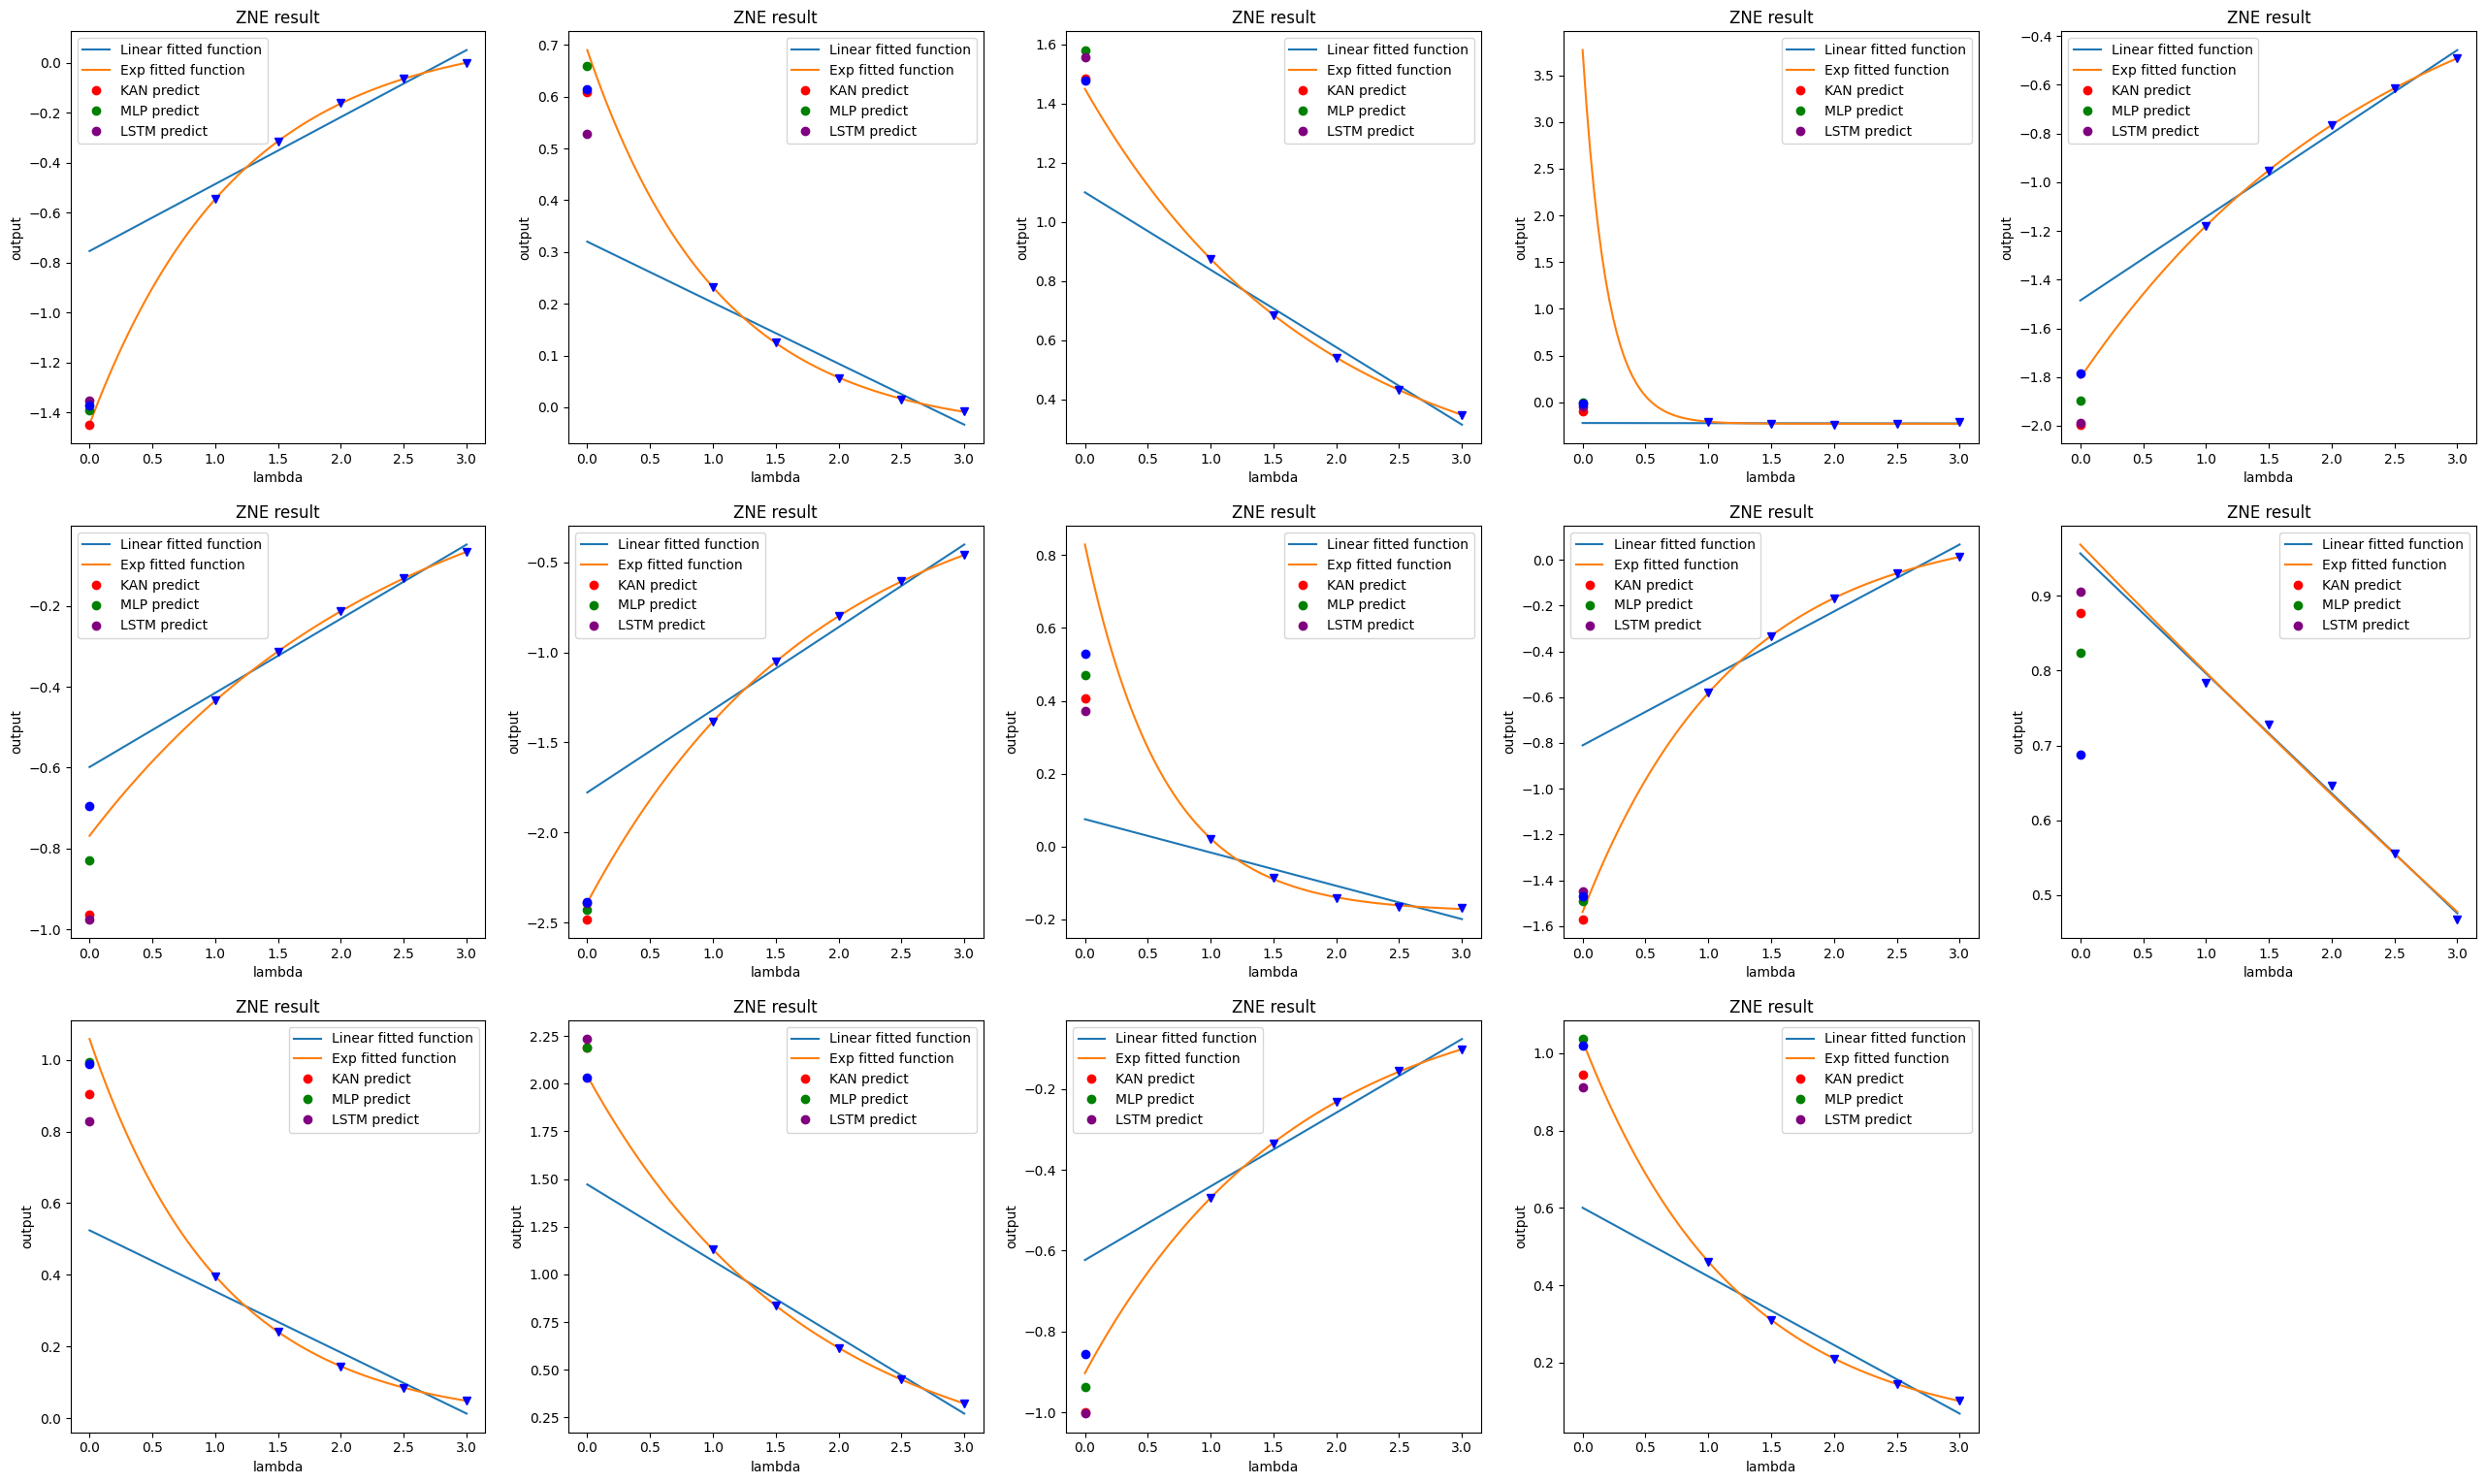

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,32))
index = 1
x_tensor = None
y_tensor = None
for (x,y) in train_dataset:
    
    y = torch.unsqueeze(y,dim=0)
    if x_tensor is None:
        x_len = len(x)
        x_tensor = x
        y_tensor = y
    else:
        x_tensor = torch.concat([x_tensor,x],dim=0)
        y_tensor = torch.concat([y_tensor,y],dim=0)
x_tensor = torch.reshape(x_tensor,[-1,len(x)])
y_tensor = torch.reshape(y_tensor,[-1,1])

output_KAN = model(x_tensor).detach().numpy()
output_MLP = model_MLP(x_tensor).detach().numpy()
output_LSTM = LSTM_model(x_tensor).detach().numpy()

model_outputs = [output_KAN,output_MLP,output_LSTM]
colors = ['red','green','purple','orange']
models = ['KAN','MLP','LSTM']

for (x,y) in train_dataset:
    if  index <15:
        
        
        
        
        plt.subplot(5,5,index)
        plt.title("ZNE result")
        plt.xlabel("lambda")
        plt.ylabel("output")
        curve_plot(input_list2,x)

        for index2,output in enumerate(model_outputs):
            plt.plot([0],output[index-1],'o',color=colors[index2],label=f'{models[index2]} predict')
        
        #plt.plot([0],y_temp_list[index-1],'o',color=colors[-1],label = 'custom')
        plt.plot(input_list2,list(x),'bv')
        plt.plot([0],y,'bo')
    
        plt.legend()
        index+=1
    else:
        index+=1


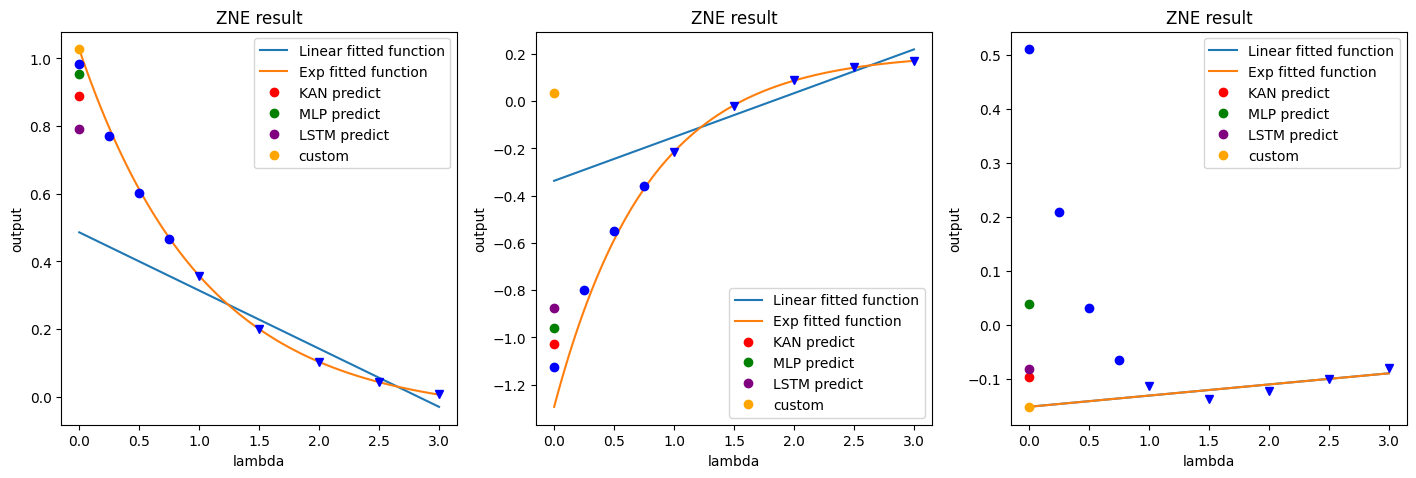

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(48,48))
index = 1
x_tensor = None
y_tensor = None
for (x,y),(x1,y1) in zip(val_dataset,val_dataset_temp):
    
    y = torch.unsqueeze(y,dim=0)
    if x_tensor is None:
        x_len = len(x)
        x_tensor = x
        y_tensor = y
    else:
        x_tensor = torch.concat([x_tensor,x],dim=0)
        y_tensor = torch.concat([y_tensor,y],dim=0)
x_tensor = torch.reshape(x_tensor,[-1,len(x)])
y_tensor = torch.reshape(y_tensor,[-1,1])

output_KAN = model(x_tensor).detach().numpy()
output_MLP = model_MLP(x_tensor).detach().numpy()
output_LSTM = LSTM_model(x_tensor).detach().numpy()

model_outputs = [output_KAN,output_MLP,output_LSTM]
colors = ['red','green','purple','orange']
models = ['KAN','MLP','LSTM']

for (x,y),(x1,y1) in zip(val_dataset,val_dataset_temp):
    if 36<index <40:
        
        
        
        
        plt.subplot(8,8,index)
        plt.title("ZNE result")
        plt.xlabel("lambda")
        plt.ylabel("output")
        curve_plot(input_list2,x)
        
        for index2,output in enumerate(model_outputs):
            plt.plot([0],output[index-1],'o',color=colors[index2],label=f'{models[index2]} predict')
        
        plt.plot([0],y_temp_list[index-1],'o',color=colors[-1],label = 'custom')
        plt.plot(input_list1[:4],list(x1[:4]),'bo')
        plt.plot(input_list2,list(x),'bv')
    
        plt.legend()
        index+=1
    else:
        index+=1

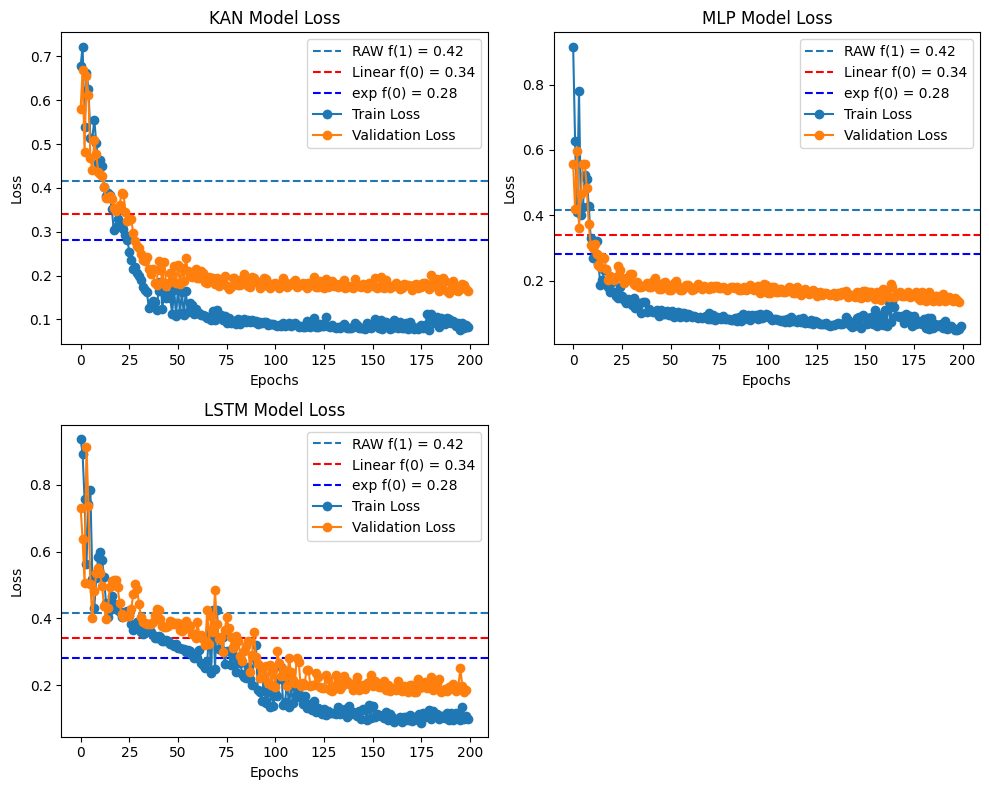

In [25]:
import matplotlib.pyplot as plt



# ÏòàÏãú Îç∞Ïù¥ÌÑ∞
KAN_model_train_loss = train_seq_KAN.train_loss_list
KAN_model_val_loss = train_seq_KAN.loss_list
MLP_model_train_loss = train_seq.train_loss_list
MLP_model_val_loss = train_seq.loss_list
LSTM_model_train_loss = train_seq_LSTM.train_loss_list
LSTM_model_val_loss = train_seq_LSTM.loss_list







# KAN Î™®Îç∏ Loss ÌîåÎ°Ø
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
# RAW loss
plt.axhline(y=raw_loss, linestyle='--', label=f"RAW f(1) = {raw_loss:.2f}")
# Lin loss
plt.axhline(y=Lin_loss, color = 'red',linestyle='--', label=f"Linear f(0) = {Lin_loss:.2f}")
# Exp loss
plt.axhline(y=exp_loss, color = 'blue',linestyle='--', label=f"exp f(0) = {exp_loss:.2f}")

plt.plot(KAN_model_train_loss, label='Train Loss', marker='o')
plt.plot(KAN_model_val_loss, label='Validation Loss', marker='o')
plt.title('KAN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MLP Î™®Îç∏ Loss ÌîåÎ°Ø
plt.subplot(2, 2, 2)
# RAW loss
plt.axhline(y=raw_loss, linestyle='--', label=f"RAW f(1) = {raw_loss:.2f}")
# Lin loss
plt.axhline(y=Lin_loss, color = 'red',linestyle='--', label=f"Linear f(0) = {Lin_loss:.2f}")
# Exp loss
plt.axhline(y=exp_loss, color = 'blue',linestyle='--', label=f"exp f(0) = {exp_loss:.2f}")
plt.plot(MLP_model_train_loss, label='Train Loss', marker='o')
plt.plot(MLP_model_val_loss, label='Validation Loss', marker='o')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MLP Î™®Îç∏ Loss ÌîåÎ°Ø
plt.subplot(2, 2, 3)
# RAW loss
plt.axhline(y=raw_loss, linestyle='--', label=f"RAW f(1) = {raw_loss:.2f}")
# Lin loss
plt.axhline(y=Lin_loss, color = 'red',linestyle='--', label=f"Linear f(0) = {Lin_loss:.2f}")
# Exp loss
plt.axhline(y=exp_loss, color = 'blue',linestyle='--', label=f"exp f(0) = {exp_loss:.2f}")
plt.plot(LSTM_model_train_loss, label='Train Loss', marker='o')
plt.plot(LSTM_model_val_loss, label='Validation Loss', marker='o')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


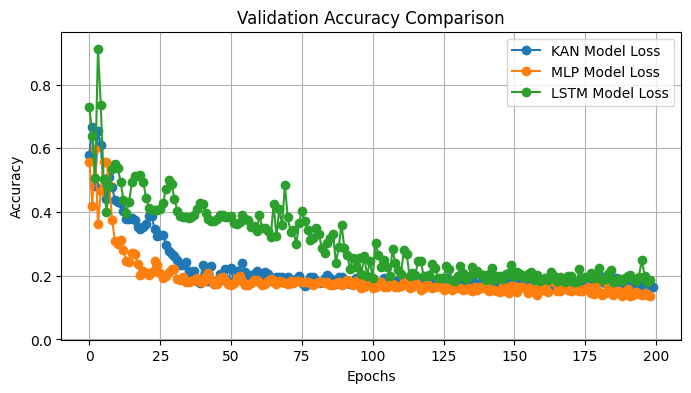

In [26]:
import matplotlib.pyplot as plt

# Epochs
# Ï†ïÌôïÎèÑ ÌîåÎ°Ø
plt.figure(figsize=(8, 4))
plt.plot(KAN_model_val_loss, label='KAN Model Loss', marker='o')
plt.plot(MLP_model_val_loss, label='MLP Model Loss', marker='o')
plt.plot(LSTM_model_val_loss, label='LSTM Model Loss', marker='o')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(np.min(MLP_model_train_loss)-0.05,np.max(MLP_model_train_loss)+0.05)
plt.show()